In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
 

In [2]:
path = "fashion-mnist.csv"

df = pd.read_csv(path)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Funciones

Funcion para ver alguna imagen de la clase elegida

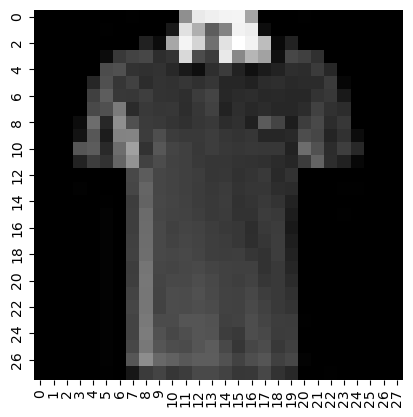

In [15]:
def mostrarImagenDe (label: int):
    clase = df[df['label'] == label].drop(columns='label')
    imagen = clase.iloc[np.random.randint(0,6000)].values.reshape(28,28)
    sns.heatmap(data=imagen, cmap='gray',cbar=False, square=True,annot=False)
    plt.show()
    plt.close()

mostrarImagenDe(0)

Funcion que me devuelve la imagen promedio de una clase en particular

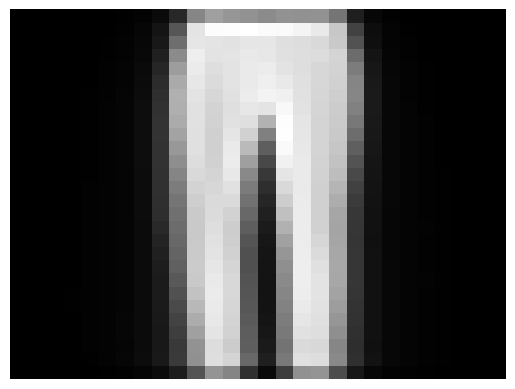

In [17]:
def promedioImagen(prenda:int):
    clase = df[df['label']== prenda].drop(columns='label')
    promedio_imagen = np.mean(clase.values,axis=0)
    promedio_imagen /= len(df[df['label']  ==1])
    promedio_imagen = promedio_imagen.reshape(28,28)
    sns.heatmap(data=promedio_imagen, cmap='gray',cbar=False, xticklabels=[],yticklabels=[])
    


promedioImagen(1)

Validacion Cruzada

In [5]:
def validacion_cruzada(model,X,Y,K):
    cv = KFold(n_splits=K,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,Y, cv=cv, scoring='accuracy')
    return scores

Testeo de modelos segun set de datos de entrenamiento

In [6]:
def testearModelo (modelo,x,y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, shuffle=True) #Aca separo el dataset en train y val
    modelo.fit(x_train, y_train)
    y_predict = modelo.predict(x_val)
    return accuracy_score(y_val,y_predict)

Calibracion de modelos

In [7]:
def calibrar(model,x,y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, shuffle=True)
    model.fit(x_train,y_train)
    best_param = model.best_params_
    best_model = model.best_estimator_
    accuracy = best_model.score(x_val,y_val)
    print(f"El mejor k es: {best_param}, con una precision de: {accuracy} ")

## Ejercicios

### Ejercicio 1.b ¿Hay clases de prendas que son parecidas entre si?

Cuando comparamos entre remaras y pantalones, la precision de clasificacion es mayor que cuando se intenta clasificar remeras y pullover

In [18]:
remYpants = df[(df['label'] == 1) | (df['label'] == 0)] #dataset de remeras y pantalones
Y = remYpants['label']
X = remYpants[['pixel1','pixel196','pixel350']] #solo le damos 3 pixeles para que entrene
k = 5
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2,shuffle=True)

neigh = KNeighborsClassifier(n_neighbors=k)

print(f"La precision cuando se comparan remeras con pantalones es de : {np.mean(validacion_cruzada(neigh,X,Y,k))}")

La precision cuando se comparan remeras con pullovers es de : 0.6076666666666666


In [19]:
remYpull = df[(df['label']== 0) | (df['label']== 2)]
X1 = remYpull[['pixel1','pixel196','pixel350']]
Y1 = remYpull['label']

x1_train, x1_val, y1_train, y1_val = train_test_split(X1,Y1, test_size=0.2, shuffle=True)

neigh2 = KNeighborsClassifier(n_neighbors=k)

print(f"La precision cuando se comparan remeras con pullovers es de : {np.mean(validacion_cruzada(neigh2,X1,Y1,k))}")

La precision cuando se comparan remeras con pullovers es de : 0.5154166666666666


### Ejercicio 2

2.a) Creo los DataFrames de pantalones y remeras

In [21]:
pantalones = df[df['label'] == 1].drop(columns='label')
remeras = df[df['label'] == 0].drop(columns='label')

2.b) Aca podemos ver que cada conjunto de datos de cada clase tiene la misma cantidad de muestras por lo que podemos decir que esta balanceado

In [22]:
print("Cantidad de muestras en pantalones: ", len(pantalones))
print("Cantidad de muestras en remeras: ", len(remeras))

Cantidad de muestras en pantalones:  6000
Cantidad de muestras en remeras:  6000


2.c) Propusimos distintos conjuntos de 3 atributos y 2 de 4 para comparar distintos modelos KNN. En la funcion `testearModelo()` se divide el data set en train y val y nos devuelve la precision de ese modelo 

In [24]:
#aca propongo 5 conjunto de atributos distintos

cols1 =['pixel1','pixel2','pixel3'] #primeros 3 pixeles de la esquina superior izquierda
cols2 = ['pixel14','pixel210','pixel406'] # recta vertical en el medio de la imagen
cols3 = ['pixel1','pixel175','pixel378'] # diagonal desdes esquina superior izquierda hasta esquina inferior derecha
cols4 = ['pixel1','pixel175','pixel378','pixel581'] #diagonal con 1 pixel mas
cols5 = ['pixel14','pixel210','pixel406','pixel602'] #Recta vertical con 1 pixel mas


Xa = remYpants[cols1]
Xb = remYpants[cols2]
Xc = remYpants[cols3]
Xd = remYpants[cols4]
Xf = remYpants[cols5]
Ys = remYpants['label']

knn5 = KNeighborsClassifier(n_neighbors=5)

#Aca testeo un modelo knn de 5 vecinos con los diferentes conjuntos de test
print(f"La precision del modelo knn5 con el dataset Xa es de: {testearModelo(knn5,Xa,Ys)}")
print(f"La precision del modelo knn5 con el dataset Xb es de: {testearModelo(knn5,Xb,Ys)}")
print(f"La precision del modelo knn5 con el dataset Xc es de: {testearModelo(knn5,Xc,Ys)}")
print(f"La precision del modelo knn5 con el dataset Xd es de: {testearModelo(knn5,Xd,Ys)}")
print(f"La precision del modelo knn5 con el dataset Xf es de: {testearModelo(knn5,Xf,Ys)}")

La precision del modelo knn5 con el dataset Xa es de: 0.5333333333333333
La precision del modelo knn5 con el dataset Xb es de: 0.8254166666666667
La precision del modelo knn5 con el dataset Xc es de: 0.9120833333333334
La precision del modelo knn5 con el dataset Xd es de: 0.94375
La precision del modelo knn5 con el dataset Xf es de: 0.8895833333333333


In [26]:
knn = KNeighborsClassifier()
hiper_grid = {'n_neighbors':[7,9,10,11,12,13,14,15,20,25,30]}

grid_search = GridSearchCV(knn, hiper_grid, cv=5, scoring='accuracy')

calibrar(grid_search,Xa,Ys)
calibrar(grid_search,Xb,Ys)
calibrar(grid_search,Xc,Ys)
calibrar(grid_search,Xd,Ys)
calibrar(grid_search,Xf,Ys)

El mejor k es: {'n_neighbors': 7}, con una precision de: 0.54375 
El mejor k es: {'n_neighbors': 25}, con una precision de: 0.8441666666666666 
El mejor k es: {'n_neighbors': 30}, con una precision de: 0.9104166666666667 
El mejor k es: {'n_neighbors': 20}, con una precision de: 0.9329166666666666 
El mejor k es: {'n_neighbors': 9}, con una precision de: 0.9041666666666667 
